## Problem Statement
1. Scan all variables for missing values and inconsistencies. If there are missing values
and/or inconsistencies, use any of the suitable techniques to deal with them.

2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.

3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Salaries.csv to Salaries.csv


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("Salaries.csv")
df

<ipython-input-2-d73a51237465>:4: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Salaries.csv")


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [3]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [4]:

df['Benefits'] = df['Benefits'].replace('Not Provided', np.nan)
df['Benefits'] = df['Benefits'].astype(float)

     
#Cleaning base pay -> converting not provided into missing values and rest of string values into float values
df["BasePay"].replace('Not Provided', np.nan, inplace =True)
df["BasePay"] = df["BasePay"].astype(float)

#Cleaning overitme pay -> converting not provided into missing values and rest of string values into float values
df["OvertimePay"].replace('Not Provided', np.nan, inplace= True)
df["OvertimePay"] = df["OvertimePay"].astype(float)

df["OtherPay"].replace('Not Provided', np.nan, inplace=True)
df["OtherPay"] = df["OtherPay"].astype(float)

df["Agency"] = df["Agency"].astype('|S')
df["Agency"]


#dropping all the records with missing values and replacing the 
df.dropna(subset=['BasePay'], inplace=True)
df.isnull().sum()
     
df.dropna(subset=['Benefits'], inplace=True)
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)
     

In [6]:

from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical variable
df['Status'] = label_encoder.fit_transform(df['Status'])

In [7]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               111886
Agency                   0
Status                   0
dtype: int64

<Axes: ylabel='Benefits'>

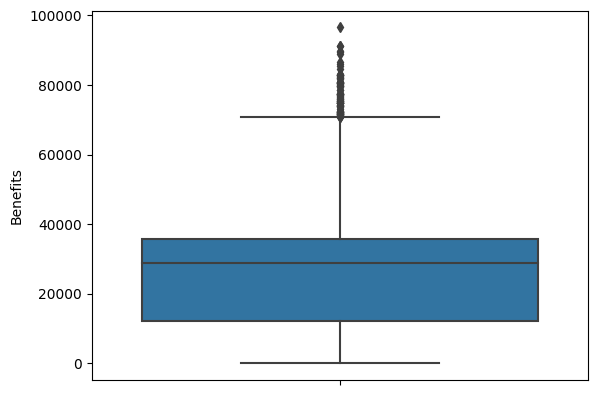

In [8]:
import seaborn as sns
sns.boxplot(y=df["Benefits"])

In [11]:
import pandas as pd

# Assuming the dataset is stored in a Pandas DataFrame called 'df'
numeric_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']

# Calculate the IQR for each numeric column
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in each numeric column
outliers = {}
for column in numeric_columns:
    outliers[column] = df[(df[column] < lower_bound[column]) | (df[column] > upper_bound[column])]

# Handle outliers by either removing or replacing them
for column, outlier_rows in outliers.items():
    # Option 1: Remove outliers
    df = df[~df.index.isin(outlier_rows.index)]

# Updated DataFrame with outliers handled
df


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
468,36628,Donald Ellison,"Deputy Dir I, MTA",177672.69,0.0,3486.00,65459.28,181158.69,246617.97,2012,NaN,b'San Francisco',2
477,36637,Dennis Kern,Dep Dir IV,177672.84,0.0,4370.58,63968.19,182043.42,246011.61,2012,NaN,b'San Francisco',2
478,36638,Joyce Hicks,Dept Head I,179186.54,0.0,3486.00,63272.83,182672.54,245945.37,2012,NaN,b'San Francisco',2
491,36651,Dawn Kamalanathan,Dep Dir IV,177672.75,0.0,4486.00,63399.29,182158.75,245558.04,2012,NaN,b'San Francisco',2
501,36661,William Lee,Dep Dir IV,177672.71,0.0,3486.00,64058.22,181158.71,245216.93,2012,NaN,b'San Francisco',2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111881,148646,Carolyn A Wilson,Human Services Technician,0.00,0.0,0.00,0.00,0.00,0.00,2014,NaN,b'San Francisco',1
111882,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.0,0.00,0.00,0.00,0.00,2014,NaN,b'San Francisco',1
111883,148649,Leon Walker,Custodian,0.00,0.0,0.00,0.00,0.00,0.00,2014,NaN,b'San Francisco',1
111884,148650,Roy I Tillery,Custodian,0.00,0.0,0.00,0.00,0.00,0.00,2014,NaN,b'San Francisco',1


<Axes: ylabel='Benefits'>

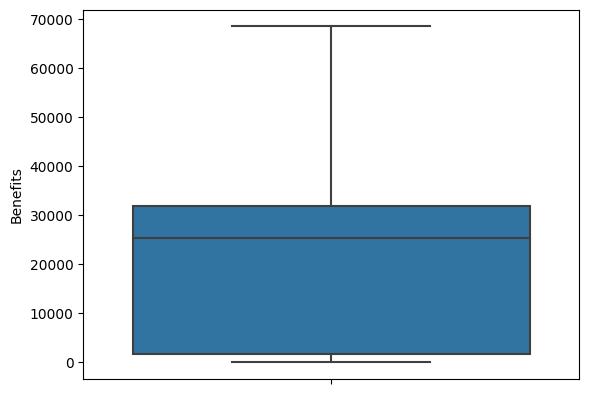

In [12]:
sns.boxplot(y=df["Benefits"])